In [1]:
##Load the training data from HDFS

import pickle
import hdfs

# Load the CIFAR10 dataset from HDFS
client = hdfs.InsecureClient('http://localhost:9870')
with client.read('/cifar10/cifar10/data_batch_1') as f:
    data_batch_1_dict = pickle.load(f, encoding='latin1')
    
client = hdfs.InsecureClient('http://localhost:9870')
with client.read('/cifar10/cifar10/data_batch_2') as f:
    data_batch_2_dict = pickle.load(f, encoding='latin1')

client = hdfs.InsecureClient('http://localhost:9870')
with client.read('/cifar10/cifar10/data_batch_3') as f:
    data_batch_3_dict = pickle.load(f, encoding='latin1')

client = hdfs.InsecureClient('http://localhost:9870')
with client.read('/cifar10/cifar10/data_batch_4') as f:
    data_batch_4_dict = pickle.load(f, encoding='latin1')

client = hdfs.InsecureClient('http://localhost:9870')
with client.read('/cifar10/cifar10/data_batch_5') as f:
    data_batch_5_dict = pickle.load(f, encoding='latin1')



In [2]:
print(len(data_batch_1_dict))

4


In [3]:
for item in data_batch_1_dict:
    print(item, type(data_batch_1_dict[item]))

batch_label <class 'str'>
labels <class 'list'>
data <class 'numpy.ndarray'>
filenames <class 'list'>


In [4]:
print("Labels:", set(data_batch_1_dict['labels'])) #This is each feature

Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [5]:

client = hdfs.InsecureClient('http://localhost:9870')
with client.read('/cifar10/batches.meta') as f:
    Meta = pickle.load(f, encoding='latin1')

print(type(Meta))
print(Meta.keys()) 

<class 'dict'>
dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])


In [6]:
print("Label Names:", Meta['label_names'] )

Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
image = data_batch_1_dict['data'][0]
print(image.shape)


(3072,)


In [8]:
image = image.reshape(3,32,32)
print(image.shape)

(3, 32, 32)


In [9]:
image = image.transpose(1,2,0)
print(image.shape)

(32, 32, 3)


Text(0.5, 1.0, 'frog')

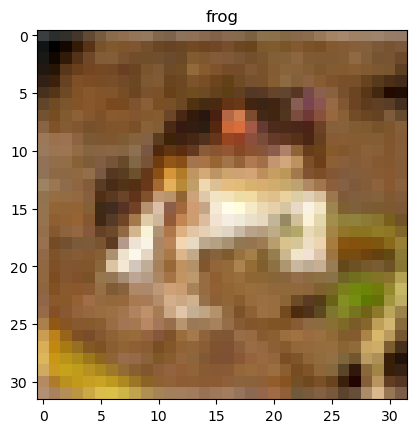

In [10]:
import matplotlib.pyplot as plt
# label names
label_name = Meta['label_names']
# take first image
image = data_batch_1_dict['data'][0]
# take first image label index
label = data_batch_1_dict['labels'][0]
# Reshape the image
image = image.reshape(3,32,32)
# Transpose the image
image = image.transpose(1,2,0)
# Display the image
plt.imshow(image)
plt.title(label_name[label])

In [11]:
import numpy as np
data_batch_1_array= data_batch_1_dict['data']
data_batch_2_array= data_batch_2_dict['data']
data_batch_3_array= data_batch_3_dict['data']
data_batch_4_array= data_batch_4_dict['data']
data_batch_5_array= data_batch_5_dict['data']
Merged_trained_data = np.concatenate((data_batch_1_array, data_batch_2_array, data_batch_3_array, data_batch_4_array, data_batch_5_array), axis=0) 

In [12]:
Merged_trained_data.shape

(50000, 3072)

In [13]:
#Bring in the test data and create XTrain, yTrain, XTest, yTest

client = hdfs.InsecureClient('http://localhost:9870')
with client.read('/cifar10/cifar10/test_batch') as f:
    test_batch = pickle.load(f, encoding='latin1')


In [14]:
X_Train = Merged_trained_data
X_Train

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 35,  40,  42, ...,  77,  66,  50],
       [189, 186, 185, ..., 169, 171, 171],
       [229, 236, 234, ..., 173, 162, 161]], dtype=uint8)

In [15]:
labels_batch_1_array= data_batch_1_dict['labels']
labels_batch_2_array= data_batch_2_dict['labels']
labels_batch_3_array= data_batch_3_dict['labels']
labels_batch_4_array= data_batch_4_dict['labels']
labels_batch_5_array= data_batch_5_dict['labels']
Merged_trained_labels = np.concatenate((labels_batch_1_array, labels_batch_2_array, labels_batch_3_array, labels_batch_4_array, labels_batch_5_array), axis=0)

y_Train = Merged_trained_labels #Merged_trained_labels
y_Train

array([6, 9, 9, ..., 9, 1, 1])

In [16]:
X_Test = test_batch['data']
X_Test

array([[158, 159, 165, ..., 124, 129, 110],
       [235, 231, 232, ..., 178, 191, 199],
       [158, 158, 139, ...,   8,   3,   7],
       ...,
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

In [17]:
y_Test = test_batch['labels']
y_Test

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


In [18]:
X_Train.shape

(50000, 3072)

In [19]:
type(X_Train)

numpy.ndarray

In [20]:

"""
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import numpy as np
tf.__version__

X_Train = tf.constant(np.zeros((50000,3072)))

X_Train.shape #TensorShape([50000, 3072])

X_Train = tf.reshape(X_Train, [-1,32,32,3])

X_Train.shape #TensorShape([50000, 32, 32, 3])

"""
#numpy.reshape(a, newshape)

X_Train = X_Train.reshape(50000, 32, 32, 3)

In [21]:
type(X_Train)

numpy.ndarray

In [22]:
X_Train.shape

(50000, 32, 32, 3)

In [23]:
num_classes = 10
from tensorflow.keras.utils import to_categorical
# One Hot Encoding of Labels using to_categorical
y_Train = to_categorical(y_Train, num_classes)
y_Test = to_categorical(y_Test, num_classes)

##Normalise the data by dividing the X files by 255 pixels
X_Train = X_Train / 255.0
X_Test = X_Test / 255.0


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Instantiate the Image Data Generator Class with the Data Augmentation
datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2, 
                             rotation_range = 20, horizontal_flip = True, 
                             vertical_flip = True, validation_split = 0.2)

# Apply the Data Augmentation to the Training Images
#datagen.fit(X_Train)
datagen.fit(X_Train)




# Create the Generator for the Training Images
train_gen = datagen.flow(X_Train, y_Train, batch_size = 32, 
                         subset = 'training')

# Create the Generator for the Validation Images
val_gen = datagen.flow(X_Train, y_Train, batch_size = 8, 
                         subset = 'validation')


img_height = 32
img_width = 32

# Building the Keras Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(rate = 0.2))
model.add(Dense(units = num_classes, activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
              metrics = ['accuracy'])

steps_per_epoch = len(X_Train) * 0.8//32

history = model.fit(train_gen, validation_data = val_gen, 
          steps_per_epoch = steps_per_epoch, epochs = 150)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

1250/1250 [==============================] - 46s 36ms/step - loss: 1.4558 - accuracy: 0.4816 - val_loss: 1.4496 - val_accuracy: 0.4871
Epoch 46/150
1250/1250 [==============================] - 46s 36ms/step - loss: 1.4518 - accuracy: 0.4821 - val_loss: 1.4505 - val_accuracy: 0.4791
Epoch 47/150
1250/1250 [==============================] - 45s 36ms/step - loss: 1.4490 - accuracy: 0.4827 - val_loss: 1.4996 - val_accuracy: 0.4746
Epoch 48/150
1250/1250 [==============================] - 45s 36ms/step - loss: 1.4471 - accuracy: 0.4873 - val_loss: 1.4508 - val_accuracy: 0.4885
Epoch 49/150
1250/1250 [==============================] - 45s 36ms/step - loss: 1.4419 - accuracy: 0.4900 - val_loss: 1.4715 - val_accuracy: 0.4787
Epoch 50/150
1250/1250 [==============================] - 45s 36ms/step - loss: 1.4434 - accuracy: 0.4847 - val_loss: 1.4725 - val_accuracy: 0.4818
Epoch 51/150
1250/1250 [==============================] - 45s 36ms/step - loss: 1.4398 - accuracy: 0.4866 - val_loss: 1.4499 

1250/1250 [==============================] - 45s 36ms/step - loss: 1.3640 - accuracy: 0.5154 - val_loss: 1.4130 - val_accuracy: 0.4958
Epoch 101/150
1250/1250 [==============================] - 45s 36ms/step - loss: 1.3665 - accuracy: 0.5140 - val_loss: 1.4539 - val_accuracy: 0.4876
Epoch 102/150
1250/1250 [==============================] - 46s 37ms/step - loss: 1.3605 - accuracy: 0.5206 - val_loss: 1.4059 - val_accuracy: 0.5041
Epoch 103/150
1250/1250 [==============================] - 45s 36ms/step - loss: 1.3642 - accuracy: 0.5177 - val_loss: 1.4040 - val_accuracy: 0.5047
Epoch 104/150
1250/1250 [==============================] - 45s 36ms/step - loss: 1.3632 - accuracy: 0.5163 - val_loss: 1.4183 - val_accuracy: 0.4955
Epoch 105/150
1250/1250 [==============================] - 45s 36ms/step - loss: 1.3618 - accuracy: 0.5179 - val_loss: 1.3910 - val_accuracy: 0.5030
Epoch 106/150
1250/1250 [==============================] - 45s 36ms/step - loss: 1.3575 - accuracy: 0.5208 - val_loss: 1

In [155]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Instantiate the Image Data Generator Class with the Data Augmentation
datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2, 
                             rotation_range = 20, horizontal_flip = True, 
                             vertical_flip = True, validation_split = 0.2)

# Apply the Data Augmentation to the Training Images
#datagen.fit(X_Train)
datagen.fit(X_Train)




# Create the Generator for the Training Images
train_gen = datagen.flow(X_Train, y_Train, batch_size = 32, 
                         subset = 'training')

# Create the Generator for the Validation Images
val_gen = datagen.flow(X_Train, y_Train, batch_size = 8, 
                         subset = 'validation')


img_height = 32
img_width = 32

# Building the Keras Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(rate = 0.2))
model.add(Dense(units = num_classes, activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
              metrics = ['accuracy'])

steps_per_epoch = len(X_Train) * 0.8//32

history = model.fit(train_gen, validation_data = val_gen, 
          steps_per_epoch = steps_per_epoch, epochs = 10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [162]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Instantiate the Image Data Generator Class with the Data Augmentation
datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2, 
                             rotation_range = 20, horizontal_flip = True, 
                             vertical_flip = True, validation_split = 0.2)

# Apply the Data Augmentation to the Training Images
#datagen.fit(X_Train)
datagen.fit(X_Train)




# Create the Generator for the Training Images
train_gen = datagen.flow(X_Train, y_Train, batch_size = 32, 
                         subset = 'training')

# Create the Generator for the Validation Images
val_gen = datagen.flow(X_Train, y_Train, batch_size = 8, 
                         subset = 'validation')


img_height = 32
img_width = 32

# Building the Keras Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(rate = 0.2))
model.add(Dense(units = num_classes, activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
              metrics = ['accuracy'])

steps_per_epoch = len(X_Train) * 0.8//32

history = model.fit(train_gen, validation_data = val_gen, 
          steps_per_epoch = steps_per_epoch, epochs = 50)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

Epoch 45/50
1250/1250 [==============================] - 139s 111ms/step - loss: 1.5230 - accuracy: 0.4580 - val_loss: 1.5220 - val_accuracy: 0.4633
Epoch 46/50
1250/1250 [==============================] - 138s 110ms/step - loss: 1.5234 - accuracy: 0.4511 - val_loss: 1.5334 - val_accuracy: 0.4560
Epoch 47/50
1250/1250 [==============================] - 138s 111ms/step - loss: 1.5201 - accuracy: 0.4563 - val_loss: 1.5316 - val_accuracy: 0.4561
Epoch 48/50
1250/1250 [==============================] - 138s 110ms/step - loss: 1.5161 - accuracy: 0.4611 - val_loss: 1.4917 - val_accuracy: 0.4727
Epoch 49/50
1250/1250 [==============================] - 139s 111ms/step - loss: 1.5168 - accuracy: 0.4565 - val_loss: 1.4881 - val_accuracy: 0.4702
Epoch 50/50
1250/1250 [==============================] - 138s 110ms/step - loss: 1.5151 - accuracy: 0.4596 - val_loss: 1.5575 - val_accuracy: 0.4456


In [161]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten(input_shape=(none,32,32,3))) # 32*32*3 = 3072
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	model = define_model()
	# fit model
	history = model.fit(X_Train, y_Train, epochs=10, batch_size=64, validation_data=(X_Test, y_Test), verbose=0)
	# evaluate model
	_, acc = model.evaluate(X_Test, y_Test, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(64, 3072)

In [ ]:
# importing all the required libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Loading the Data from the in built library
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the Pixel Data
train_images = train_images/255.0
test_images = test_images/255.0

# Instantiate the Image Data Generator Class with the Data Augmentation
datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2, 
                             rotation_range = 20, horizontal_flip = True, 
                             vertical_flip = True, validation_split = 0.2)

num_classes = 10

# One Hot Encoding of Labels using to_categorical
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


# Apply the Data Augmentation to the Training Images
datagen.fit(train_images)

# Create the Generator for the Training Images
train_gen = datagen.flow(train_images, train_labels, batch_size = 32, 
                         subset = 'training')

# Create the Generator for the Validation Images
val_gen = datagen.flow(train_images, train_labels, batch_size = 8, 
                         subset = 'validation')


img_height = 32
img_width = 32

# Building the Keras Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(rate = 0.2))
model.add(Dense(units = num_classes, activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
              metrics = ['accuracy'])

steps_per_epoch = len(train_images) * 0.8//32

history = model.fit(train_gen, validation_data = val_gen, 
          steps_per_epoch = steps_per_epoch, epochs = 2)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_Train = to_categorical(y_Train,10)
y_Test = to_categorical(y_Test,10)

In [ ]:
y_Train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


model = Sequential()
model.add(Conv2D(32,(5,5),activation = 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(1500, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(750, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
metrics = ['accuracy'])

In [ ]:


hist = model.fit(X_Train,y_Train, batch_size = 64 , epochs = 2, 
validation_split = 0.2)

In [ ]:

hist = model.fit(X_Train,y_Train, batch_size = 64 , epochs = 100, 
validation_split = 0.2)

In [ ]:
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model (excluding the top layer)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Create a sequential model
custom_model = Sequential()

# Add the VGG16 model (excluding the top layer)
custom_model.add(vgg16_model)

# Flatten the output from VGG16
custom_model.add(Flatten())

# Add a fully connected layer
custom_model.add(Dense(256, activation='relu'))
custom_model.add(Dropout(0.5))

# Add the output layer for CIFAR-10 classification (10 classes)
custom_model.add(Dense(10, activation='softmax'))


In [ ]:
# Compile the model
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

# Train the model
custom_model.fit(X_Train, y_Train, batch_size=64, epochs=10, validation_data=(X_Test, y_Test))


In [ ]:
X_train = combined_dict['data']
print("Shape before reshape:", X_train.shape)
# Reshape the whole image data
X_train = X_train.reshape(len(X_train),3,32,32)
print("Shape after reshape and before transpose:", X_train.shape)
# Transpose the whole data
X_train = X_train.transpose(0,2,3,1)
print("Shape after reshape and transpose:", X_train.shape)

In [ ]:
type(X_train)

In [ ]:
 
# example of loading the cifar10 dataset
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
y_test = to_categorical(y_test)


In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	# ...
	return model

In [ ]:
# fit model
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)

In [ ]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [ ]:
print('> %.3f' % (acc * 100.0))

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	X_train, Y_train, X_test, y_test = load_dataset()
	# prepare pixel data
	X_train, X_test = prep_pixels(X_train, X_test)
	# define model
	model = define_model()
	# fit model
	history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, X_test, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

In [ ]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(X_train, Y_train), (X_test, y_test) = load_dataset()
	# one hot encode target values
	Y_train = to_categorical(Y_train)
	y_test = to_categorical(y_test)
	return X_train, Y_train, X_test, y_test

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	# ...
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	X_train, Y_train, X_test, y_test = load_dataset()
	# prepare pixel data
	X_train, X_test = prep_pixels(X_train, X_test)
	# define model
	model = define_model()
	# fit model
	history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)
	# evaluate model
	_, acc = model.evaluate(X_test, y_test, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))


In [ ]:
model.add(Dense(Y_train.shape[1], activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)
